<a href="https://colab.research.google.com/github/tomonari-masada/course2021-stats1/blob/main/normal_distribution_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 混合正規分布の最尤推定によるirisデータセットの分類
* 訓練データを使って、正規分布のパラメータを最尤推定。
 * 各特徴量は独立に単変量正規分布に従うと仮定。
* テストデータについて、コンポーネントごとの対数尤度を計算。
 * 尤度を最大にするコンポーネントを予測結果として出力。

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

%config InlineBackend.figure_formats = {'png', 'retina'}

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X = iris['data']
y = iris['target']
target_names = iris['target_names']
feature_names = iris['feature_names']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=123)

In [ ]:
print(list(zip(*(X_train, y_train))))

[(array([7.4, 2.8, 6.1, 1.9]), 2), (array([6. , 2.2, 5. , 1.5]), 2), (array([4.7, 3.2, 1.6, 0.2]), 0), (array([5.1, 3.5, 1.4, 0.2]), 0), (array([6. , 2.2, 4. , 1. ]), 1), (array([5. , 2.3, 3.3, 1. ]), 1), (array([7.9, 3.8, 6.4, 2. ]), 2), (array([5.4, 3.9, 1.7, 0.4]), 0), (array([5.4, 3.9, 1.3, 0.4]), 0), (array([5.8, 2.7, 3.9, 1.2]), 1), (array([5. , 2. , 3.5, 1. ]), 1), (array([5. , 3.2, 1.2, 0.2]), 0), (array([6.8, 3.2, 5.9, 2.3]), 2), (array([6.7, 3. , 5.2, 2.3]), 2), (array([5.8, 2.7, 5.1, 1.9]), 2), (array([5.8, 2.8, 5.1, 2.4]), 2), (array([6.3, 3.4, 5.6, 2.4]), 2), (array([5.5, 2.3, 4. , 1.3]), 1), (array([5.1, 3.8, 1.5, 0.3]), 0), (array([4.4, 3. , 1.3, 0.2]), 0), (array([6.5, 3.2, 5.1, 2. ]), 2), (array([5.1, 3.3, 1.7, 0.5]), 0), (array([4.9, 3.1, 1.5, 0.1]), 0), (array([6.7, 3.1, 4.7, 1.5]), 1), (array([6.1, 3. , 4.6, 1.4]), 1), (array([5.5, 2.5, 4. , 1.3]), 1), (array([5.7, 2.6, 3.5, 1. ]), 1), (array([5.8, 2.7, 5.1, 1.9]), 2), (array([6.7, 3.1, 4.4, 1.4]), 1), (array([6.4, 

In [ ]:
mu_ML = []
sigma_ML = []
theta_ML = []
for k, target_name in enumerate(target_names):
  print(target_name)
  indices = y_train == k
  mu_ML.append(X_train[indices].mean(0))
  sigma_ML.append(np.sqrt(((X_train[indices] - mu_ML[-1]) ** 2).mean(0)))
  theta_ML.append(indices.sum() / len(indices))
mu_ML = np.array(mu_ML)
sigma_ML = np.array(sigma_ML)
theta_ML = np.array(theta_ML)

setosa
versicolor
virginica


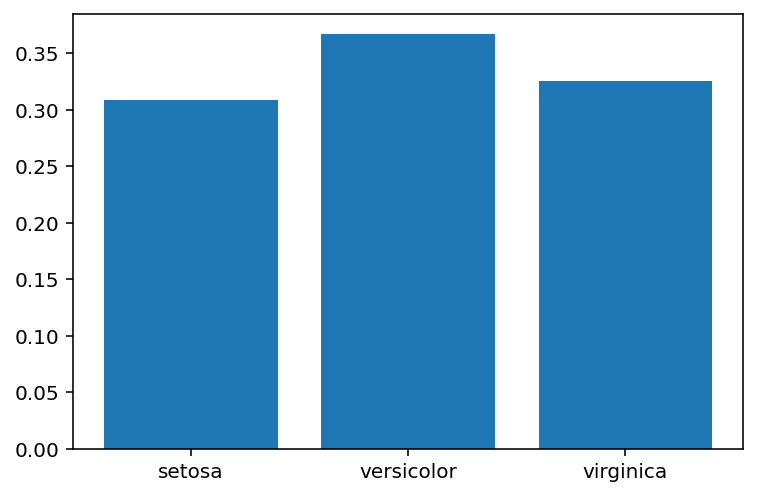

In [ ]:
plt.bar(target_names, theta_ML);

In [ ]:
mu_ML

array([[5.01621622, 3.43243243, 1.46756757, 0.25945946],
       [5.95      , 2.78409091, 4.24090909, 1.32272727],
       [6.58717949, 2.95897436, 5.57948718, 2.02820513]])

In [ ]:
sigma_ML

array([[0.32508919, 0.38698701, 0.16448783, 0.1101828 ],
       [0.52027091, 0.31690491, 0.47688296, 0.20545253],
       [0.63049817, 0.33183093, 0.5402656 , 0.27822581]])

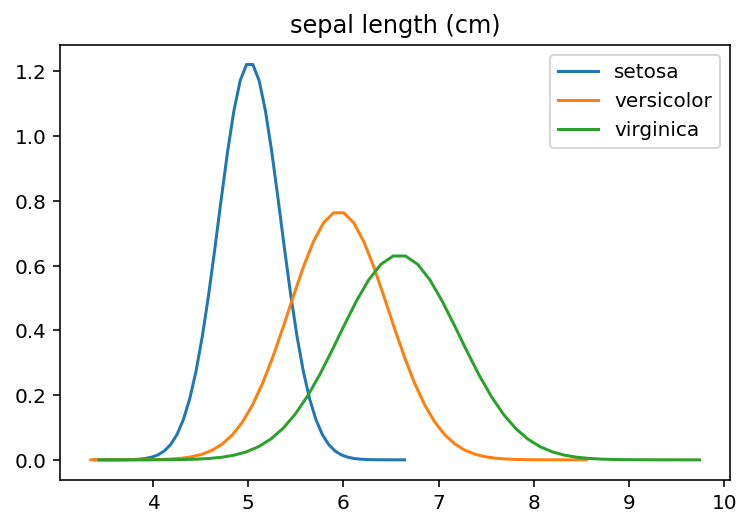

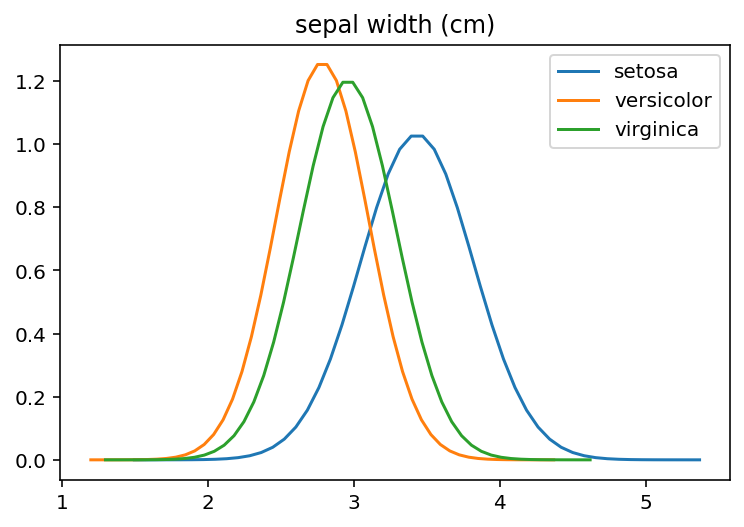

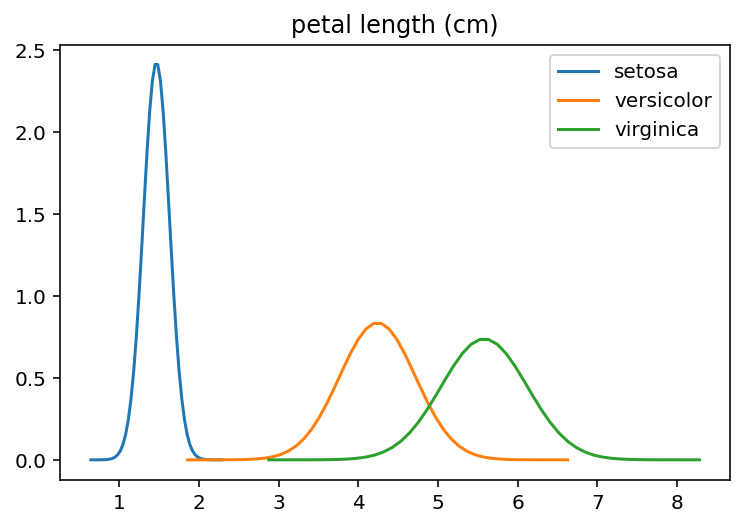

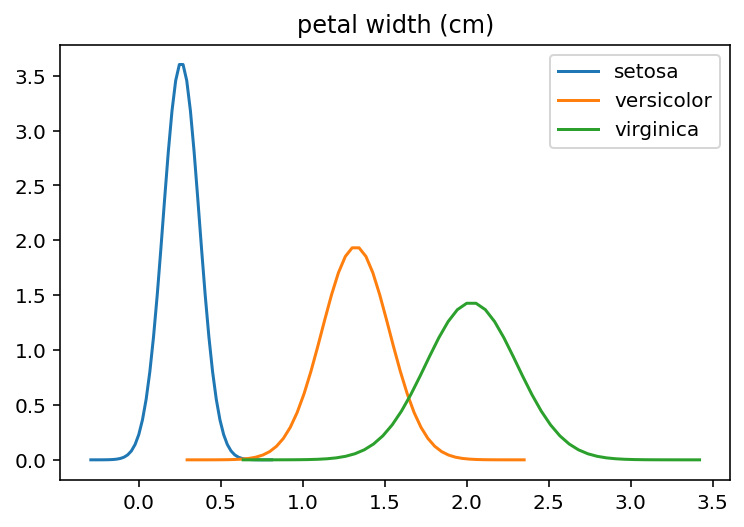

In [ ]:
from scipy.stats import norm

x_axis = np.arange(-400, 401) * 0.01
for j, feature_name in enumerate(feature_names):
  for k, target_name in enumerate(target_names):
    x_axis = np.linspace(mu_ML[k,j] - sigma_ML[k,j] * 5, mu_ML[k,j] + sigma_ML[k,j] * 5)
    plt.plot(x_axis, norm.pdf(x_axis, loc=mu_ML[k,j], scale=sigma_ML[k,j]), label=target_name)
  plt.title(feature_name)
  plt.legend()
  plt.show()
  plt.close()

In [ ]:
accuracy = 0
for n, x in enumerate(X_test):
  likelihood = []
  for k, _ in enumerate(target_names):
    likelihood.append(np.log(theta_ML[k]) + norm.logpdf(x, loc=mu_ML[k], scale=sigma_ML[k]).sum())
  accuracy += np.argmax(np.array(likelihood)) == y_test[n]
  print(f'No.{n} prediction={target_names[np.argmax(np.array(likelihood))]} ground truth={target_names[y_test[n]]}')
print(f'test accuracy : {accuracy / len(y_test):.3f}')

No.0 prediction=versicolor ground truth=versicolor
No.1 prediction=virginica ground truth=virginica
No.2 prediction=virginica ground truth=virginica
No.3 prediction=versicolor ground truth=versicolor
No.4 prediction=setosa ground truth=setosa
No.5 prediction=virginica ground truth=virginica
No.6 prediction=versicolor ground truth=versicolor
No.7 prediction=setosa ground truth=setosa
No.8 prediction=setosa ground truth=setosa
No.9 prediction=versicolor ground truth=versicolor
No.10 prediction=virginica ground truth=virginica
No.11 prediction=setosa ground truth=setosa
No.12 prediction=versicolor ground truth=versicolor
No.13 prediction=virginica ground truth=virginica
No.14 prediction=virginica ground truth=virginica
No.15 prediction=virginica ground truth=virginica
No.16 prediction=setosa ground truth=setosa
No.17 prediction=setosa ground truth=setosa
No.18 prediction=versicolor ground truth=versicolor
No.19 prediction=setosa ground truth=setosa
No.20 prediction=setosa ground truth=set